In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel


In [2]:
# load the dataset
df = pd.read_csv('data/churn_dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Rename columns with '_' instead of spaces
df.columns = df.columns.str.replace(' ','_')

# Drop the phone number column.
# df.drop('phone_number', axis=1, inplace=True)
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [4]:
#Perfoming label encoding
#False becomes 0 and True becomes 1
encoder = LabelEncoder()
df['churn'] = encoder.fit_transform(df['churn'])


In [5]:
df.drop('phone_number', axis=1, inplace=True)

In [6]:
# Assuming df is your DataFrame containing the state column
state_timezone_mapping = {
    'CT': 'EST', 'DE': 'EST', 'FL': 'EST', 'GA': 'EST', 'IN': 'EST', 'KY': 'EST', 'MA': 'EST',
    'MD': 'EST', 'ME': 'EST', 'MI': 'EST', 'NC': 'EST', 'NH': 'EST', 'NJ': 'EST', 'NY': 'EST',
    'OH': 'EST', 'PA': 'EST', 'RI': 'EST', 'SC': 'EST', 'TN': 'EST', 'VA': 'EST', 'VT': 'EST',
    'WV': 'EST',
    'AL': 'CST', 'AR': 'CST', 'IA': 'CST', 'IL': 'CST', 'KS': 'CST', 'LA': 'CST', 'MN': 'CST',
    'MO': 'CST', 'MS': 'CST', 'ND': 'CST', 'NE': 'CST', 'OK': 'CST', 'SD': 'CST', 'TX': 'CST',
    'WI': 'CST',
    'CO': 'MST', 'ID': 'MST', 'MT': 'MST', 'NM': 'MST', 'UT': 'MST', 'WY': 'MST',
    'AZ': 'MST', 'NV': 'PST',
    'CA': 'PST', 'OR': 'PST', 'WA': 'PST', 'AK': 'AKST', 'HI': 'HST', 'DC': 'EST'}

# Add a new column for time zone based on the mapping
df['time_zone'] = df['state'].map(state_timezone_mapping)

# Group the states by time zone and calculate value counts
state_counts_by_timezone = df.groupby('time_zone')['state'].value_counts()

print(state_counts_by_timezone)

time_zone  state
AKST       AK        52
CST        MN        84
           AL        80
           WI        78
           TX        72
           KS        70
           MS        65
           MO        63
           ND        62
           NE        61
           OK        61
           SD        60
           IL        58
           AR        55
           LA        51
           IA        44
EST        WV       106
           NY        83
           OH        78
           VA        77
           CT        74
           MI        73
           VT        73
           IN        71
           MD        70
           NC        68
           NJ        68
           MA        65
           RI        65
           FL        63
           ME        62
           DE        61
           SC        60
           KY        59
           NH        56
           DC        54
           GA        54
           TN        53
           PA        45
HST        HI        53
MST        WY        77

In [7]:
df.drop('state', axis=1, inplace=True)

In [8]:
#Performing label encoding
#No becomes 0 and yes becomes 1.
df['international_plan'] = encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = encoder.fit_transform(df['voice_mail_plan'])


In [9]:
df.drop(labels=['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'],
       axis=1,
       inplace=True)
df.head()

,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,time_zone
0,128,415,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0,CST
1,107,415,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0,EST
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,EST
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,EST
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,CST


In [10]:
# Define X and y, and split train/test data
df_copy = df.copy()

X = df_copy.drop(columns=['churn'],axis=1)
y = df_copy['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=7,stratify=y)

In [11]:
# Tranform 'state' column with OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(X_train[['time_zone']]),columns=ohe.get_feature_names_out(['time_zone']),index=X_train.index)
X_train.drop(columns=['time_zone'],axis=1,inplace=True)
X_train = pd.concat([X_train,ohe_df],axis=1)
X_train

,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,time_zone_CST,time_zone_EST,time_zone_HST,time_zone_MST,time_zone_PST
2965,103,415,0,0,180.2,134,97.7,85,181.7,134,8.4,3,1,1.0,0.0,0.0,0.0,0.0
692,82,408,0,0,185.8,36,276.5,134,192.1,104,5.7,7,4,1.0,0.0,0.0,0.0,0.0
64,38,408,0,0,131.2,98,162.9,97,159.0,106,8.2,6,2,0.0,1.0,0.0,0.0,0.0
1005,12,510,1,0,216.7,117,116.5,126,220.0,110,9.8,4,2,1.0,0.0,0.0,0.0,0.0
2892,103,415,0,1,138.8,80,142.0,108,183.8,77,11.8,7,1,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,169,408,0,0,147.2,115,161.9,123,142.1,103,7.2,6,3,0.0,1.0,0.0,0.0,0.0
2038,136,408,0,0,269.8,106,228.8,101,257.5,106,10.1,8,1,1.0,0.0,0.0,0.0,0.0
3300,111,415,0,1,127.1,94,228.3,116,166.7,108,7.1,3,1,0.0,1.0,0.0,0.0,0.0
3313,127,408,0,0,102.8,128,143.7,95,191.4,97,10.0,5,1,0.0,0.0,0.0,1.0,0.0


In [12]:
# Tranform 'area_code' column with OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(X_train[['area_code']]),columns=ohe.get_feature_names_out(['area_code']),index=X_train.index)
X_train.drop(columns=['area_code'],axis=1,inplace=True)
X_train = pd.concat([X_train,ohe_df],axis=1)
X_train

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,time_zone_CST,time_zone_EST,time_zone_HST,time_zone_MST,time_zone_PST,area_code_415,area_code_510
2965,103,0,0,180.2,134,97.7,85,181.7,134,8.4,3,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
692,82,0,0,185.8,36,276.5,134,192.1,104,5.7,7,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
64,38,0,0,131.2,98,162.9,97,159.0,106,8.2,6,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1005,12,1,0,216.7,117,116.5,126,220.0,110,9.8,4,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2892,103,0,1,138.8,80,142.0,108,183.8,77,11.8,7,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,169,0,0,147.2,115,161.9,123,142.1,103,7.2,6,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2038,136,0,0,269.8,106,228.8,101,257.5,106,10.1,8,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3300,111,0,1,127.1,94,228.3,116,166.7,108,7.1,3,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3313,127,0,0,102.8,128,143.7,95,191.4,97,10.0,5,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
# Print original class distribution
print('Original Class Distribution: \n')
print(y_train.value_counts())

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

# Preview new class distribution
print('------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original Class Distribution: 

0    2137
1     362
Name: churn, dtype: int64
------------------------------
Synthetic sample class distribution: 

1    2137
0    2137
Name: churn, dtype: int64


In [14]:
logreg_model_l1_resampling = LogisticRegression(random_state=42,solver='liblinear',penalty='l1')
logreg_model_l1_resampling.fit(X_train_resampled,y_train_resampled)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

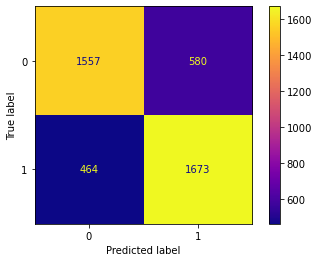

In [15]:
ConfusionMatrixDisplay.from_estimator(logreg_model_l1_resampling,X_train_resampled,y_train_resampled,cmap='plasma');

In [16]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring = 'recall')
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} recall
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [18]:
selector = SelectFromModel(logreg_model_l1_resampling)

selector.fit(X_train_resampled, y_train_resampled)

SelectFromModel(estimator=LogisticRegression(penalty='l1', random_state=42,
                                             solver='liblinear'))

In [19]:
sup = selector.get_support()
unique, counts = np.unique(sup, return_counts=True)
print(np.asarray((unique, counts)).T)
#We are only keeping 58 columns


[[ 0  1]
 [ 1 18]]


In [20]:
dict(zip(X_train_resampled.columns, selector.get_support()))

{'account_length': True,
 'international_plan': True,
 'voice_mail_plan': True,
 'total_day_minutes': True,
 'total_day_calls': True,
 'total_eve_minutes': True,
 'total_eve_calls': True,
 'total_night_minutes': True,
 'total_night_calls': True,
 'total_intl_minutes': True,
 'total_intl_calls': True,
 'customer_service_calls': True,
 'time_zone_CST': True,
 'time_zone_EST': True,
 'time_zone_HST': False,
 'time_zone_MST': True,
 'time_zone_PST': True,
 'area_code_415': True,
 'area_code_510': True}

In [21]:
def select_important_features(X, selector):
    """
    Given a DataFrame and a selector, use the selector to choose
    the most important columns
    """
    imps = dict(zip(X.columns, selector.get_support()))
    selected_array = selector.transform(X)
    selected_df = pd.DataFrame(selected_array,
                               columns=[col for col in X.columns if imps[col]],
                               index=X.index)
    return selected_df

In [22]:
X_train_selected = select_important_features(X=X_train_resampled, selector=selector)

In [23]:
logreg_sel_model = LogisticRegression(random_state=42,solver='liblinear',penalty='l1')
logreg_sel_model.fit(X_train_selected,y_train_resampled)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

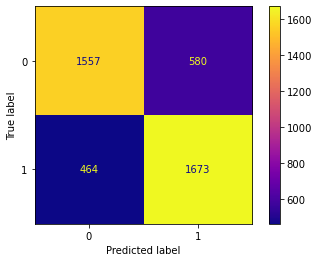

In [24]:
ConfusionMatrixDisplay.from_estimator(logreg_sel_model,X_train_selected,y_train_resampled,cmap='plasma');

In [25]:
logreg1_SMOTE_results = ModelWithCV(
                                        logreg_model_l1_resampling,
                                        'L1_resampling',
                                        X_train_resampled,
                                        y_train_resampled
)

logreg1_SMOTE_featureselect_results = ModelWithCV(
                                        logreg_sel_model,
                                        'L1_resampling_feature_select',
                                        X_train_selected,
                                        y_train_resampled
)


model_results = [
    logreg1_SMOTE_results,
    logreg1_SMOTE_featureselect_results
]


CV Results for `L1_resampling` model:
            0.77822 ± 0.04659 recall
        
CV Results for `L1_resampling_feature_select` model:
            0.77868 ± 0.04612 recall
        


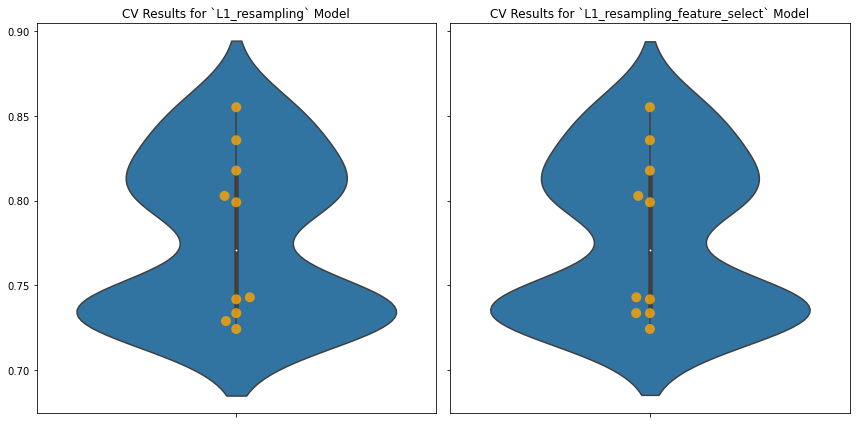

In [26]:
f,axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))

for ax, result in zip(axes, model_results):
    ax = result.plot_cv(ax)
    result.print_cv_summary()
plt.tight_layout();
#Now with cross validation, higher tolerance is better.

In [27]:
model_results = [logreg1_SMOTE_featureselect_results]
C_values = [0.0001, 0.001, 0.01, 0.1, 1]
#We are trying to figure out c. with hyperparamter tunning and cross valiudation
for c in C_values:
    logreg_model = LogisticRegression(random_state=42,solver='liblinear',penalty='l1', C=c) #solver = "liblinear"
    logreg_model.fit(X_train_selected, y_train_resampled)
    # Save Results
    new_model_results = ModelWithCV(
                            logreg_model,
                            f'scaled_features_c{c:e}',
                            X_train_selected,
                            y_train_resampled
    )
    model_results.append(new_model_results)
    new_model_results.print_cv_summary()

CV Results for `scaled_features_c1.000000e-04` model:
            0.81049 ± 0.04278 recall
        
CV Results for `scaled_features_c1.000000e-03` model:
            0.59571 ± 0.04629 recall
        
CV Results for `scaled_features_c1.000000e-02` model:
            0.75950 ± 0.04410 recall
        
CV Results for `scaled_features_c1.000000e-01` model:
            0.78196 ± 0.04993 recall
        
CV Results for `scaled_features_c1.000000e+00` model:
            0.77868 ± 0.04612 recall
        


In [28]:
logreg_model_bsf = LogisticRegression(random_state=42,solver='liblinear',penalty='l1', C=0.0001)
logreg_model_bsf.fit(X_train_selected, y_train_resampled)

LogisticRegression(C=0.0001, penalty='l1', random_state=42, solver='liblinear')

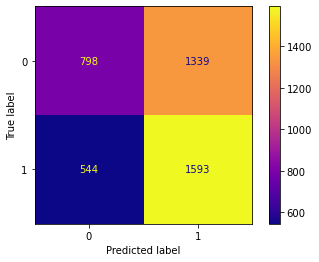

In [29]:
ConfusionMatrixDisplay.from_estimator(logreg_model_bsf,X_train_selected,y_train_resampled,cmap='plasma');